# Bloque 2 - Unidad 03 - Ajuste de datos y regresión **no** lineal.

`scipy.optimize` es un submódulo de `SciPy` dedicado a la optimización y resolución de ecuaciones. Ofrece una amplia colección de algoritmos para encontrar mínimos o máximos de funciones, resolver sistemas de ecuaciones no lineales, buscar raíces de funciones y ajustar modelos a datos experimentales. Entre sus herramientas se incluyen métodos de optimización local y global, algoritmos de mínimos cuadrados, búsqueda de raíces, programación lineal y optimización con restricciones. Dentro de `optimize`, la función `curve_fit` es especialmente popular para el ajuste de curvas, ya que facilita encontrar automáticamente los parámetros de una función modelo que mejor se adaptan a un conjunto de datos, recibiendo como entrada la función a ajustar, los valores de `x` y las observaciones `y`. Internamente, `curve_fit` utiliza el motor especializado `least_squares`, que trabaja a un nivel más general tomando como entrada una función que devuelve los residuos, es decir, las diferencias entre las predicciones del modelo y los datos observados. Esta diferencia en el enfoque permite que `least_squares` sea más flexible y potente para resolver una amplia variedad de problemas de ajuste no lineal, mientras que `curve_fit` ofrece una interfaz simplificada para casos de uso comunes.

Documentación: https://docs.scipy.org/doc/scipy/reference/optimize.html




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import scipy as sp
from scipy.optimize import curve_fit


### Ajuste de una gaussiana

1. Simulá datos con el siguiente código

```python
rng = np.random.default_rng()
x = np.linspace(-5, 5, 100)
y_true = 5 * np.exp(-(x - 0)**2 / (2 * 1**2))
y = rng.normal(y_true, 0.2)
```

2. Ajustá los datos usando `scipy.optimize.curve_fit` con buenas condiciones iniciales (cercanas a los parámetros reales).

$$ y = A e^{-\frac{(x-x_0)^2}{2\sigma^2}} $$

3. Ajustá nuevamente usando malas condiciones iniciales (valores alejados de los reales).
4. ¿Cuanto vale el RMSE en cada caso?
5. Graficá los datos y las curvas ajustadas.


**Para discutir en grupo**: Para cada ajuste, registrá el número de evaluaciones de la función (`nfev`). ¿hay diferencia? ¿Por qué?

In [2]:
rng = np.random.default_rng() #inicializo un generador de n aleatorios
x = np.linspace(-5, 5, 100)
y_true = 5 * np.exp(-(x - 0)**2 / (2 * 1**2))
y = rng.normal(y_true, 0.2)

In [3]:
def gauss(x, A, x0, sigma):#tres parametros
  return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [4]:
#calculamos el root mean square error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [5]:
def sse(predictions, targets): #todas las desviaciones estandar son iguales

    return ((predictions - targets) ** 2).sum()

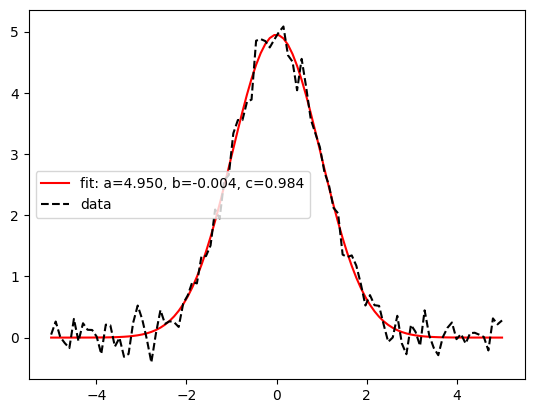

el RMSE es: 0.0449263069712086


In [6]:
popt, pcov = curve_fit(gauss, x, y, p0=[5,0,1])

popt


plt.plot(x, gauss(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(gauss(x,*popt), y_true)}") #revisar en la docu "semilla"

In [7]:
parametro_a=np.linspace(-10,10,100)
parametro_b=np.linspace(-10,10,100)
parametro_c=np.linspace(-10,10,100)

In [8]:
lista=[]
parametros=[]
for b in parametro_b:
  for a in parametro_a:
    for c in parametro_c:
      lista.append(sse(gauss(x,a,b,c),y_true))
      parametros.append([a,b,c])

In [9]:
parametros=np.array(parametros)
lista=np.array(lista)
print(parametros.shape)
print(lista.shape)

(1000000, 3)
(1000000,)


In [10]:
sse_multidim = np.reshape(lista,(100,100,100))

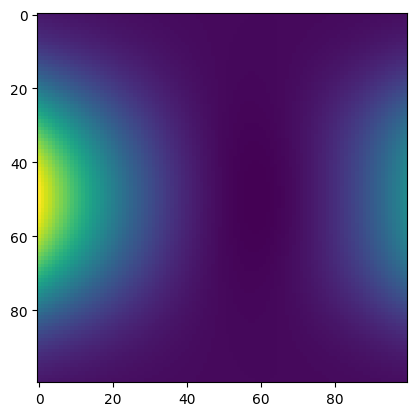

In [11]:
# data=pd.DataFrame({"a":parametros[:,0],"b":parametros[:,1],"c":parametros[:,2],"sse":lista})
plt.imshow(sse_multidim[:, :, 30]) #vario el c

<Axes: >

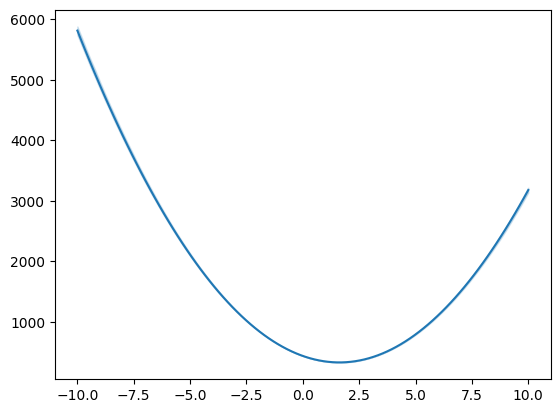

In [12]:
sns.lineplot(x=parametros[:,0],y=lista) #hacer esto

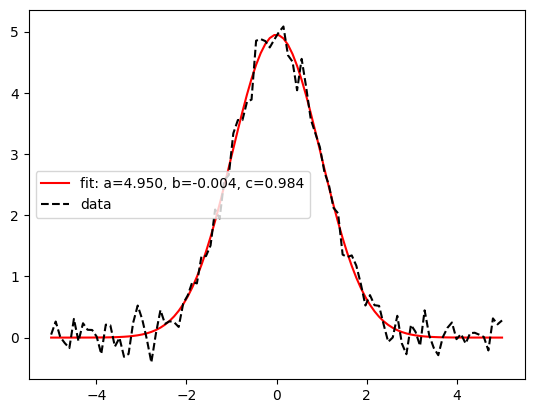

el RMSE es: 0.044926300461882486


In [13]:
#ajusto sin pasar parametros
popt, pcov = curve_fit(gauss, x, y)

popt


plt.plot(x, gauss(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(gauss(x,*popt), y_true)}")

<ipython-input-14-f5992002a378>:2: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gauss, x, y, p0=[20,10,15])


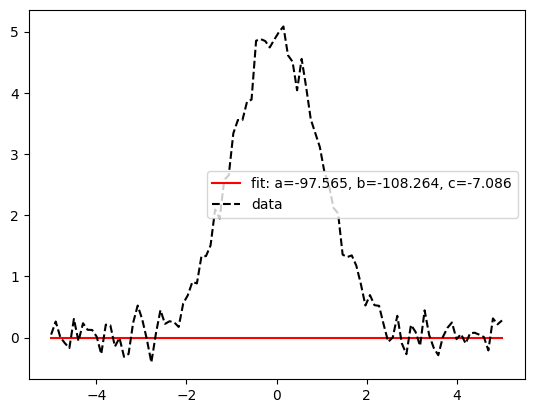

el RMSE es: 2.0944744641525963


In [14]:
#ajusto pasando malos parametros
popt, pcov = curve_fit(gauss, x, y, p0=[20,10,15])

popt


plt.plot(x, gauss(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(gauss(x,*popt), y_true)}")

### Ajuste de función oscilatoria

1. Simulá datos de una función

```python
rng = np.random.default_rng()
t = np.linspace(0, 4*np.pi, 100)
y_true = 3 * np.cos(2 * t + 0.5) + 1
y = rng.normal(y_true, 0.5)
```

2. Ajustá los datos usando `scipy.optimize.curve_fit` con buenas condiciones iniciales (cercanas a los parámetros reales).

$$y = a \cos(\omega t + \phi) + B$$

3. Ajustá nuevamente usando malas condiciones iniciales (valores alejados de los reales).
4. ¿Cuanto vale el RMSE en cada caso?
5. Graficá los datos y las curvas ajustadas.

In [15]:
rng = np.random.default_rng()
t = np.linspace(0, 4*np.pi, 100)
y_true = 3 * np.cos(2 * t + 0.5) + 1
y = rng.normal(y_true, 0.5)

In [16]:
def osc(t, a, omega, phi, B): #4 parametros
  return a * np.cos(omega * t + phi) + B

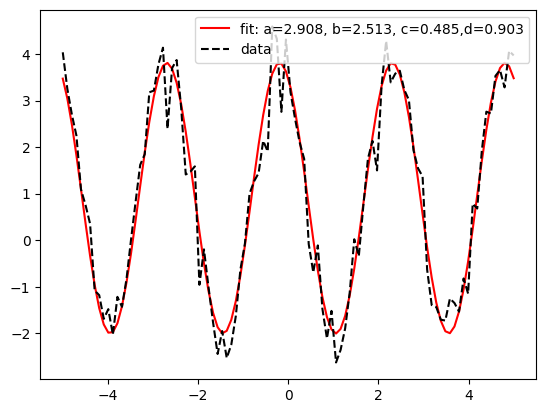

el RMSE es: 0.12164836063025444


In [17]:
popt, pcov = curve_fit(osc, x, y, p0=[3,2,0.5,1]) #buenas condiciones iniciales

popt


plt.plot(x, osc(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f' % tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(osc(x,*popt), y_true)}")

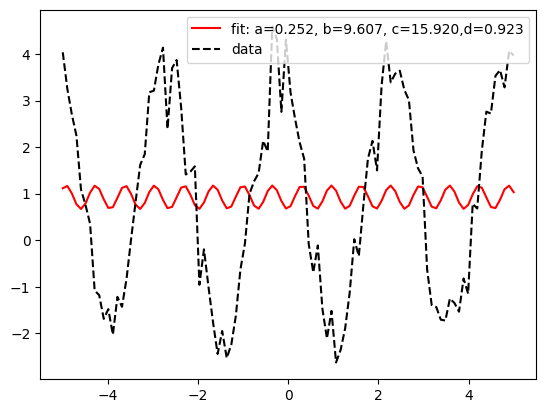

el RMSE es: 2.129700778525514


In [18]:
popt, pcov = curve_fit(osc, x, y, p0=[20,10,15,25]) #malas condiciones iniciales

popt


plt.plot(x, osc(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f' % tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(osc(x,*popt), y_true)}")

###Ajuste de suma de dos gaussianas

1. Simulá datos con el siguiente código:

```python
rng = np.random.default_rng()
x = np.linspace(-5, 10, 200)
y_true = 3 * np.exp(-(x - 0)**2 / (2 * 1**2)) + 2 * np.exp(-(x - 5)**2 / (2 * 1.5**2))
y = rng.normal(y_true, 0.2)
```
2. Ajustá los datos usando `scipy.optimize.curve_fit` con buenas condiciones iniciales.

$$ y = A_1 e^{-\frac{(x-x_1)^2}{2\sigma_1^2}} + A_2 e^{-\frac{(x-x_2)^2}{2\sigma_2^2}} $$

3. Repetí con malas condiciones iniciales.
4. Registrá `nfev` y `njev` en cada caso.
5. Graficá los resultados.

In [19]:
#njev no esta en curve fit, es la cantidad de veces que ejecuto el jacobiano
#no es necesarimente la cantidad de veces que llamo a la funcion
#evaluar el jacobiano es caro luego se intenta evitar
#se "asume"que el gradiente sigue apuntando al mismo lugar (algo asi)
#durante varios pasos hasta volver a calcular el jacobiano

In [20]:
rng = np.random.default_rng()
x = np.linspace(-5, 10, 200)
y_true = 3 * np.exp(-(x - 0)**2 / (2 * 1**2)) + 2 * np.exp(-(x - 5)**2 / (2 * 1.5**2))
y = rng.normal(y_true, 0.2)

In [21]:
def gauss2(x, A1, x1, sigma1, A2, x2, sigma2):
  return A1 * np.exp(-(x - x1)**2 / (2 * sigma1**2)) + A2 * np.exp(-(x - x2)**2 / (2 * sigma2**2))

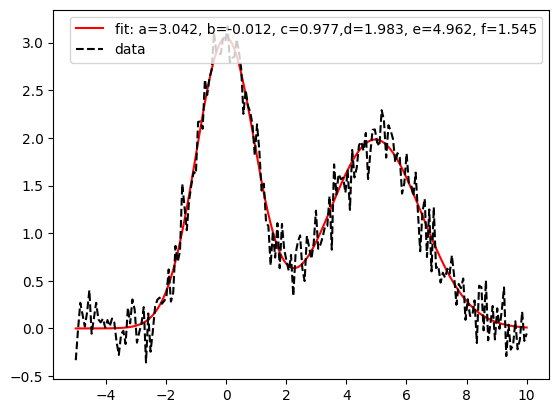

el RMSE es: 0.023474778374549376
nfev: 29


In [22]:
popt, pcov,infodict, mesg,ier= curve_fit(gauss2, x, y, p0=[3,0,1,2,5,1.5],full_output=True) #buenas condiciones

popt


plt.plot(x, gauss2(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f, e=%5.3f, f=%5.3f'  %tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(gauss2(x,*popt), y_true)}")
print(f"nfev: {infodict['nfev']}")


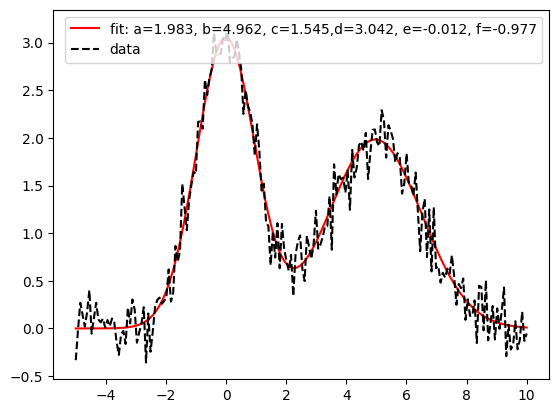

el RMSE es: 0.023474801800395073
nfev: 97


In [23]:
popt, pcov,infodict, mesg,ier= curve_fit(gauss2, x, y, full_output=True) #sin condiciones iniciales #con malas, ni siquiera encontraba

popt


plt.plot(x, gauss2(x, *popt), 'r-',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f, e=%5.3f, f=%5.3f'  %tuple(popt))
plt.plot(x, y, 'k--', label='data')
plt.legend()
plt.show()
print(f"el RMSE es: {rmse(gauss2(x,*popt), y_true)}")
print(f"nfev: {infodict['nfev']}")



**Bonus**: En cada caso ¿Hay algún parámetro que afecte mas en el caso de elegir mas la condición inicial? Hace un gráfico del paisaje de SSE en función de los parámetros para contraponer a la respuesta que acabas de dar.

In [24]:
#hacer heat map

**Bonus Extra**:
- ¿Cómo cambia el codigo si usas la función `scipy.optimize.least_squares`?
- ¿Cómo cambia el codigo si usas la función `scipy.optimize.minimize`?